## Βασικά Παραδείγματα Pandas

Αυτό το σημειωματάριο θα σας καθοδηγήσει σε ορισμένες πολύ βασικές έννοιες των Pandas. Θα ξεκινήσουμε με την εισαγωγή τυπικών βιβλιοθηκών επιστήμης δεδομένων:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Σειρές

Η σειρά είναι σαν μια λίστα ή μονοδιάστατος πίνακας, αλλά με δείκτες. Όλες οι λειτουργίες ευθυγραμμίζονται με τους δείκτες.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


Μία από τις συχνές χρήσεις των σειρών είναι οι **χρονικές σειρές**. Στις χρονικές σειρές, το index έχει μια ειδική δομή - συνήθως ένα εύρος από ημερομηνίες ή χρονικές στιγμές. Μπορούμε να δημιουργήσουμε ένα τέτοιο index με τη χρήση του `pd.date_range`.

Ας υποθέσουμε ότι έχουμε μια σειρά που δείχνει την ποσότητα προϊόντων που αγοράζονται κάθε μέρα, και γνωρίζουμε ότι κάθε Κυριακή πρέπει επίσης να παίρνουμε ένα αντικείμενο για τον εαυτό μας. Δείτε πώς μπορούμε να το μοντελοποιήσουμε χρησιμοποιώντας σειρές:


Length of index is 366


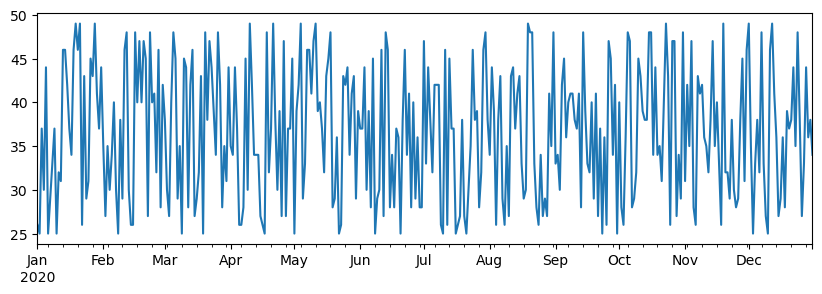

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Όπως μπορείτε να δείτε, έχουμε προβλήματα εδώ, επειδή στις εβδομαδιαίες σειρές οι μη αναφερόμενες ημέρες θεωρούνται ότι λείπουν (`NaN`), και η προσθήκη του `NaN` σε έναν αριθμό μας δίνει `NaN`. Για να πάρουμε σωστό αποτέλεσμα, πρέπει να καθορίσουμε το `fill_value` όταν προσθέτουμε σειρές:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


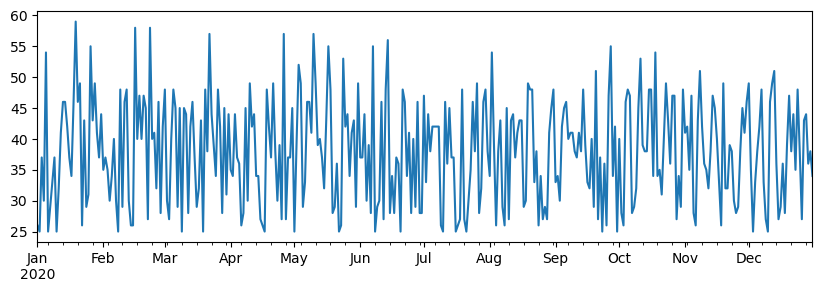

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

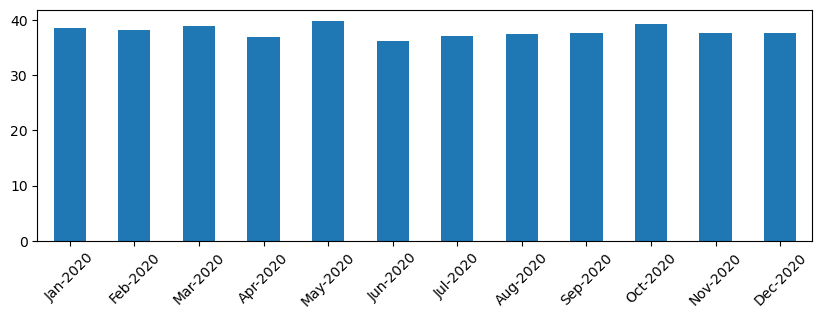

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

Ένα dataframe είναι ουσιαστικά μια συλλογή από σειρές με τον ίδιο δείκτη. Μπορούμε να συνδυάσουμε πολλές σειρές μαζί σε ένα dataframe. Δεδομένων των σειρών `a` και `b` που ορίστηκαν παραπάνω:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

Μπορούμε επίσης να χρησιμοποιήσουμε Series ως στήλες και να καθορίσουμε ονόματα στηλών χρησιμοποιώντας λεξικό:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Το ίδιο αποτέλεσμα μπορεί να επιτευχθεί με τη μετατόπιση (και στη συνέχεια την μετονομασία των στηλών, ώστε να ταιριάζουν με το προηγούμενο παράδειγμα):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**Επιλογή στηλών** από το DataFrame μπορεί να γίνει έτσι:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Επιλογή γραμμών** βάσει έκφρασης φίλτρου:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

Ο τρόπος που λειτουργεί είναι ότι η έκφραση `df['A']<5` επιστρέφει μια σειρά boolean, η οποία υποδεικνύει αν η έκφραση είναι `True` ή `False` για κάθε στοιχείο της σειράς. Όταν η σειρά χρησιμοποιείται ως δείκτης, επιστρέφει ένα υποσύνολο γραμμών στο DataFrame. Έτσι, δεν είναι δυνατό να χρησιμοποιηθεί αυθαίρετη έκφραση boolean της Python, για παράδειγμα, η γραφή `df[df['A']>5 and df['A']<7]` θα ήταν λανθασμένη. Αντίθετα, θα πρέπει να χρησιμοποιήσετε την ειδική λειτουργία `&` στις σειρές boolean:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**Δημιουργία νέων υπολογίσιμων στηλών**. Μπορούμε εύκολα να δημιουργήσουμε νέες υπολογίσιμες στήλες για το DataFrame μας χρησιμοποιώντας διαισθητικές εκφράσεις. Ο παρακάτω κώδικας υπολογίζει την απόκλιση του A από τη μέση τιμή του.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

Αυτό που συμβαίνει στην πραγματικότητα είναι ότι υπολογίζουμε μια σειρά και στη συνέχεια αναθέτουμε αυτή τη σειρά στην αριστερή πλευρά, δημιουργώντας μια άλλη στήλη.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**Επιλογή γραμμών βάσει αριθμών** μπορεί να γίνει χρησιμοποιώντας τη δομή `iloc`. Για παράδειγμα, για να επιλέξετε τις πρώτες 5 γραμμές από το DataFrame:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Ομαδοποίηση** χρησιμοποιείται συχνά για να επιτευχθεί ένα αποτέλεσμα παρόμοιο με *συγκεντρωτικούς πίνακες* στο Excel. Υποθέστε ότι θέλουμε να υπολογίσουμε τη μέση τιμή της στήλης `A` για κάθε δεδομένο αριθμό του `LenB`. Τότε μπορούμε να ομαδοποιήσουμε το DataFrame μας κατά `LenB`, και να καλέσουμε `mean`:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Εάν χρειάζεται να υπολογίσουμε τον μέσο όρο και τον αριθμό των στοιχείων στην ομάδα, τότε μπορούμε να χρησιμοποιήσουμε μια πιο σύνθετη συνάρτηση `aggregate`:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## Εκτύπωση και Οπτικοποίηση

Ο Data Scientist συχνά χρειάζεται να εξερευνήσει τα δεδομένα, επομένως είναι σημαντικό να μπορεί να τα οπτικοποιήσει. Όταν το DataFrame είναι μεγάλο, πολλές φορές θέλουμε απλώς να βεβαιωθούμε ότι κάνουμε τα πάντα σωστά εκτυπώνοντας τις πρώτες λίγες γραμμές. Αυτό μπορεί να γίνει καλώντας `df.head()`. Εάν το εκτελείτε από το Jupyter Notebook, θα εκτυπώσει το DataFrame σε μια ωραία μορφή πίνακα.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

Έχουμε επίσης δει τη χρήση της συνάρτησης `plot` για την απεικόνιση ορισμένων στηλών. Παρόλο που η `plot` είναι πολύ χρήσιμη για πολλές εργασίες και υποστηρίζει πολλούς διαφορετικούς τύπους γραφημάτων μέσω της παραμέτρου `kind=`, μπορείτε πάντα να χρησιμοποιήσετε τη βιβλιοθήκη `matplotlib` για να σχεδιάσετε κάτι πιο σύνθετο. Θα καλύψουμε την οπτικοποίηση δεδομένων λεπτομερώς σε ξεχωριστά μαθήματα του μαθήματος.


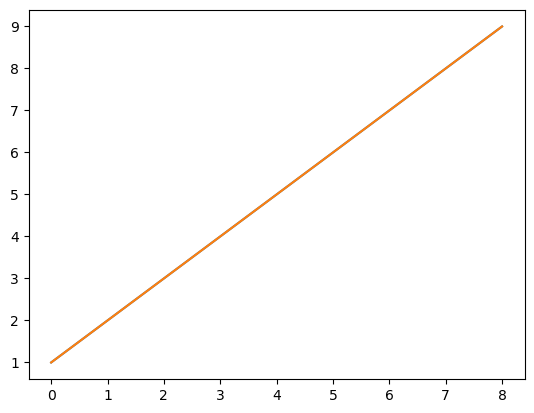

In [61]:
df['A'].plot()
plt.show()

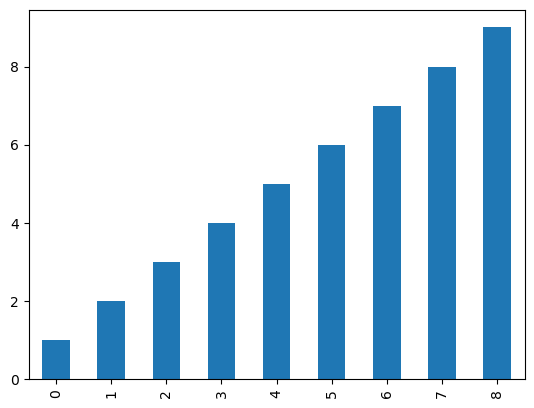

In [63]:
df['A'].plot(kind='bar')
plt.show()

Αυτή η επισκόπηση καλύπτει τις πιο σημαντικές έννοιες του Pandas, ωστόσο η βιβλιοθήκη είναι πολύ πλούσια και δεν υπάρχει όριο σε αυτά που μπορείτε να κάνετε με αυτήν! Ας εφαρμόσουμε τώρα αυτή τη γνώση για την επίλυση συγκεκριμένου προβλήματος.



---

**Αποποίηση ευθύνης**:  
Αυτό το έγγραφο έχει μεταφραστεί χρησιμοποιώντας την υπηρεσία αυτόματης μετάφρασης [Co-op Translator](https://github.com/Azure/co-op-translator). Παρόλο που καταβάλλουμε προσπάθειες για ακρίβεια, παρακαλούμε να έχετε υπόψη ότι οι αυτοματοποιημένες μεταφράσεις ενδέχεται να περιέχουν σφάλματα ή ανακρίβειες. Το πρωτότυπο έγγραφο στη μητρική του γλώσσα θα πρέπει να θεωρείται η αυθεντική πηγή. Για κρίσιμες πληροφορίες, συνιστάται επαγγελματική ανθρώπινη μετάφραση. Δεν φέρουμε ευθύνη για τυχόν παρεξηγήσεις ή εσφαλμένες ερμηνείες που προκύπτουν από τη χρήση αυτής της μετάφρασης.
